## 1. Import basic libraries

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick

## 2. Read final.csv

In [2]:
data = pd.read_csv('Data/final.csv')

## 3. And now let's carefully analyse the dataframe and its variables to check if we want to keep all of them and if we need to tidy any of them.

In [3]:
data.head(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,1752,11391,18,0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,1753,11391,53,0,85.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
2,1754,11391,115,0,80.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268


In [4]:
data.tail(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
207153,37441,573320,227,0,100.0,GGG,2014J,F,South East Region,Lower Than A Level,80-90%,35-55,0,30,N,Fail,269
207154,37442,573320,227,0,20.0,GGG,2014J,F,South East Region,Lower Than A Level,80-90%,35-55,0,30,N,Fail,269
207155,37443,573320,227,0,40.0,GGG,2014J,F,South East Region,Lower Than A Level,80-90%,35-55,0,30,N,Fail,269


In [5]:
report = pandas_profiling.ProfileReport(data)
report

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207156 entries, 0 to 207155
Data columns (total 17 columns):
id_assessment                 207156 non-null int64
id_student                    207156 non-null int64
date_submitted                207156 non-null int64
is_banked                     207156 non-null int64
score                         207156 non-null float64
code_module                   207156 non-null object
code_presentation             207156 non-null object
gender                        207156 non-null object
region                        207156 non-null object
highest_education             207156 non-null object
imd_band                      207156 non-null object
age_band                      207156 non-null object
num_of_prev_attempts          207156 non-null int64
studied_credits               207156 non-null int64
disability                    207156 non-null object
final_result                  207156 non-null object
module_presentation_length    207156 non-null 

## 3.1 Categorical variables:

- id_assessment
- id_student
- is_banked
- code_module
- code_presentation
- gender
- region
- highest_education
- imd_band
- age_band
- disability
- final_result

### id_assessment

How many unique assessments do we have?

In [7]:
len(data.id_assessment.value_counts())

188

As this is a categorical variable, we need to transform the column type from int64 to object.

In [8]:
data['id_assessment'] = data['id_assessment'].apply(str)

In [9]:
crossidass = pd.crosstab(data.score, data.id_assessment, margins=True, margins_name='Total')
display(crossidass.head(3))
display(crossidass.tail(3))

id_assessment,14984,14985,14986,14987,14988,14989,14991,14992,14993,14994,...,37435,37436,37437,37438,37439,37440,37441,37442,37443,Total
score,,,,,,,,,,,,,,,,,,,,,
0.0,6,6,10,8,7,6,1,3,0,1,...,2,1,2,1,0,1,1,10,5,616
1.0,0,0,0,0,0,0,0,0,0,0,...,0,1,3,0,0,0,0,0,0,764
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


id_assessment,14984,14985,14986,14987,14988,14989,14991,14992,14993,14994,...,37435,37436,37437,37438,37439,37440,37441,37442,37443,Total
score,,,,,,,,,,,,,,,,,,,,,
99.0,1,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,976
100.0,0,1,2,2,5,4,947,670,560,552,...,0,0,0,341,263,236,334,142,191,20489
Total,1428,1282,1104,949,889,775,1259,1120,1023,960,...,591,545,504,535,508,483,477,419,345,207156


### id_student

How many different students do we have data from?

In [10]:
len(data.id_student.value_counts())

23362

Same way as id_assessment, this is a categorical variable, so we need to apply the same transformation.

In [11]:
data['id_student'] = data['id_student'].apply(str)

In [12]:
crossidst = pd.crosstab(data.score, data.id_student, margins=True, margins_name='Total')
display(crossidst.head(3))
display(crossidst.tail(3))

id_student,100064,100282,100561,1006742,100788,1008675,100893,101116,101217,101279,...,99151,991843,992544,996047,99670,99799,998493,999174,99993,Total
score,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,616
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,764
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


id_student,100064,100282,100561,1006742,100788,1008675,100893,101116,101217,101279,...,99151,991843,992544,996047,99670,99799,998493,999174,99993,Total
score,,,,,,,,,,,,,,,,,,,,,
99.0,0,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,976
100.0,0,0,0,0,2,4,0,0,0,0,...,0,0,1,0,2,1,0,0,0,20489
Total,12,1,7,2,34,11,5,5,4,1,...,1,4,5,4,8,10,5,12,11,207156


### is_banked

A status flag indicating that the assessment result has been transferred from a previous presentation.

In [13]:
data.is_banked.value_counts()

0    203607
1      3549
Name: is_banked, dtype: int64

Same way as before, we apply the same transformation.

In [14]:
data['is_banked'] = data['is_banked'].apply(str)

In [15]:
crossbanked = pd.crosstab(data.score, data.is_banked, margins=True, margins_name='Total')
display(crossbanked.head(3))
display(crossbanked.tail(3))

is_banked,0,1,Total
score,,,
0.0,614,2,616
1.0,764,0,764
2.0,17,0,17


is_banked,0,1,Total
score,,,
99.0,969,7,976
100.0,20209,280,20489
Total,203607,3549,207156


### code_module

In [16]:
data.code_module.value_counts()

FFF    60348
BBB    45106
DDD    37445
CCC    32896
GGG    15506
EEE    12488
AAA     3367
Name: code_module, dtype: int64

In [17]:
crossmodule = pd.crosstab(data.score, data.code_module, margins=True, margins_name='Total')
display(crossmodule.head(3))
display(crossmodule.tail(3))

code_module,AAA,BBB,CCC,DDD,EEE,FFF,GGG,Total
score,,,,,,,,
0.0,6,133,130,120,47,128,52,616
1.0,0,734,1,7,1,2,19,764
2.0,0,0,8,4,3,2,0,17


code_module,AAA,BBB,CCC,DDD,EEE,FFF,GGG,Total
score,,,,,,,,
99.0,0,9,248,120,152,445,2,976
100.0,0,11098,1847,778,289,1082,5395,20489
Total,3367,45106,32896,37445,12488,60348,15506,207156


### code_presentation

In [18]:
data.code_presentation.value_counts()

2014J    64870
2013J    56064
2014B    49971
2013B    36251
Name: code_presentation, dtype: int64

In [19]:
crosspres = pd.crosstab(data.score, data.code_presentation, margins=True, margins_name='Total')
display(crosspres.head(3))
display(crosspres.tail(3))

code_presentation,2013B,2013J,2014B,2014J,Total
score,,,,,
0.0,118,115,205,178,616
1.0,7,29,22,706,764
2.0,4,3,5,5,17


code_presentation,2013B,2013J,2014B,2014J,Total
score,,,,,
99.0,109,219,245,403,976
100.0,3580,6689,5462,4758,20489
Total,36251,56064,49971,64870,207156


### gender

In [20]:
data.gender.value_counts()

M    118757
F     88399
Name: gender, dtype: int64

In [21]:
crossgender = pd.crosstab(data.score, data.gender, margins=True, margins_name='Total')
display(crossgender.head(3))
display(crossgender.tail(3))

gender,F,M,Total
score,,,
0.0,262,354,616
1.0,676,88,764
2.0,4,13,17


gender,F,M,Total
score,,,
99.0,234,742,976
100.0,15191,5298,20489
Total,88399,118757,207156


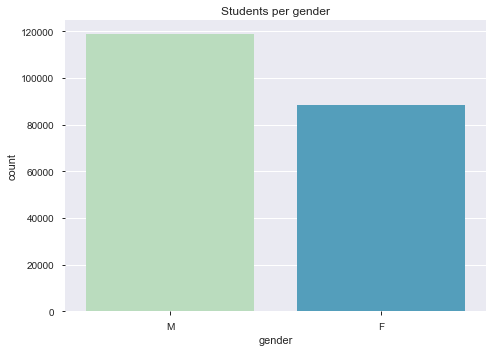

In [22]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
sns.countplot(x="gender", data=data, palette='GnBu')
ax.set_title("Students per gender")
plt.tight_layout()
plt.show()

### region

In [23]:
data.region.value_counts()

Scotland                22691
East Anglian Region     21410
South Region            20865
London Region           19531
North Western Region    16852
South West Region       15923
West Midlands Region    15584
East Midlands Region    14713
South East Region       13705
Wales                   12961
North Region            12259
Yorkshire Region        12145
Ireland                  8517
Name: region, dtype: int64

In [24]:
crossregion = pd.crosstab(data.score, data.region, margins=True, margins_name='Total')
display(crossregion.head(3))
display(crossregion.tail(3))

region,East Anglian Region,East Midlands Region,Ireland,London Region,North Region,North Western Region,Scotland,South East Region,South Region,South West Region,Wales,West Midlands Region,Yorkshire Region,Total
score,,,,,,,,,,,,,,
0.0,48,44,35,69,42,44,54,22,53,41,56,56,52,616
1.0,82,61,7,55,36,49,69,49,97,53,88,52,66,764
2.0,1,0,0,1,0,3,7,1,1,2,0,1,0,17


region,East Anglian Region,East Midlands Region,Ireland,London Region,North Region,North Western Region,Scotland,South East Region,South Region,South West Region,Wales,West Midlands Region,Yorkshire Region,Total
score,,,,,,,,,,,,,,
99.0,83,53,40,100,96,67,150,54,102,70,42,62,57,976
100.0,2294,1573,763,1845,943,1435,1801,1635,2006,1780,1527,1611,1276,20489
Total,21410,14713,8517,19531,12259,16852,22691,13705,20865,15923,12961,15584,12145,207156


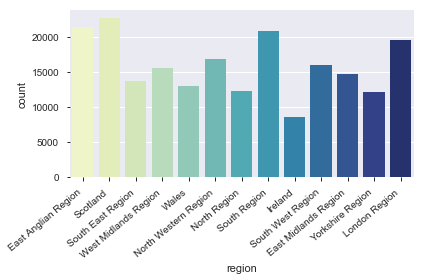

In [25]:
ax = sns.countplot(x="region", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### highest_education

In [26]:
data.highest_education.value_counts()

A Level or Equivalent          95331
Lower Than A Level             73665
HE Qualification               33824
Post Graduate Qualification     2713
No Formal quals                 1623
Name: highest_education, dtype: int64

In [27]:
crosshi = pd.crosstab(data.score, data.highest_education, margins=True, margins_name='Total')
display(crosshi.head(3))
display(crosshi.tail(3))

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification,Total
score,,,,,,
0.0,251,72,269,20,4,616
1.0,325,104,322,10,3,764
2.0,3,6,8,0,0,17


highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification,Total
score,,,,,,
99.0,417,268,240,3,48,976
100.0,9122,2802,8106,180,279,20489
Total,95331,33824,73665,1623,2713,207156


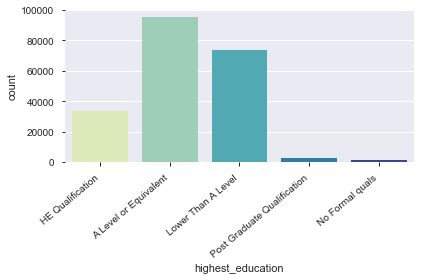

In [28]:
ax = sns.countplot(x="highest_education", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### imd_band

Specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.

In [29]:
data.imd_band.value_counts()

30-40%     22761
20-30%     21092
50-60%     19991
40-50%     19971
10-20      19799
70-80%     19423
60-70%     19311
80-90%     19131
90-100%    18261
0-10%      18110
?           9306
Name: imd_band, dtype: int64

In [30]:
crossimd = pd.crosstab(data.score, data.imd_band, margins=True, margins_name='Total')
display(crossimd.head(3))
display(crossimd.tail(3))

imd_band,0-10%,10-20,20-30%,30-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%,?,Total
score,,,,,,,,,,,,
0.0,101,95,77,65,53,55,45,46,34,31,14,616
1.0,73,107,94,92,80,78,70,61,60,43,6,764
2.0,1,3,0,0,1,3,3,5,0,1,0,17


imd_band,0-10%,10-20,20-30%,30-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%,?,Total
score,,,,,,,,,,,,
99.0,59,68,64,98,84,87,96,87,109,134,90,976
100.0,1774,2063,2127,2200,2097,2130,1887,1903,1918,1790,600,20489
Total,18110,19799,21092,22761,19971,19991,19311,19423,19131,18261,9306,207156


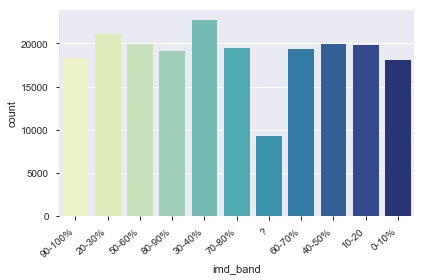

In [31]:
ax = sns.countplot(x="imd_band", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### age_band

In [32]:
data.age_band.value_counts()

0-35     143237
35-55     62377
55<=       1542
Name: age_band, dtype: int64

In [33]:
crossage = pd.crosstab(data.score, data.age_band, margins=True, margins_name='Total')
display(crossage.head(3))
display(crossage.tail(3))

age_band,0-35,35-55,55<=,Total
score,,,,
0.0,440,171,5,616
1.0,489,272,3,764
2.0,12,5,0,17


age_band,0-35,35-55,55<=,Total
score,,,,
99.0,603,357,16,976
100.0,12226,8145,118,20489
Total,143237,62377,1542,207156


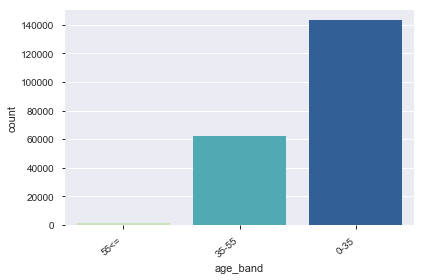

In [34]:
ax = sns.countplot(x="age_band", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### disability

In [35]:
data.disability.value_counts()

N    188215
Y     18941
Name: disability, dtype: int64

In [36]:
crossdi = pd.crosstab(data.score, data.disability, margins=True, margins_name='Total')
display(crossdi.head(3))
display(crossdi.tail(3))

disability,N,Y,Total
score,,,
0.0,534,82,616
1.0,693,71,764
2.0,15,2,17


disability,N,Y,Total
score,,,
99.0,920,56,976
100.0,18529,1960,20489
Total,188215,18941,207156


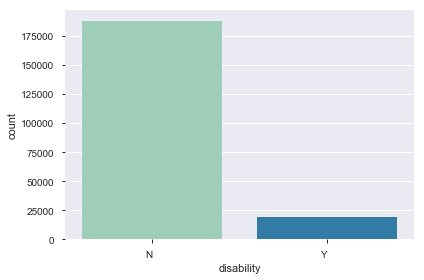

In [37]:
ax = sns.countplot(x="disability", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()
plt.show()

### final_result

In [38]:
data.final_result.value_counts()

Pass           117942
Fail            32950
Distinction     30317
Withdrawn       25947
Name: final_result, dtype: int64

In [39]:
crossfi = pd.crosstab(data.score, data.final_result, margins=True, margins_name='Total')
display(crossfi.head(3))
display(crossfi.tail(3))

final_result,Distinction,Fail,Pass,Withdrawn,Total
score,,,,,
0.0,5,265,116,230,616
1.0,81,142,377,164,764
2.0,0,7,3,7,17


final_result,Distinction,Fail,Pass,Withdrawn,Total
score,,,,,
99.0,462,39,417,58,976
100.0,5672,2174,11219,1424,20489
Total,30317,32950,117942,25947,207156


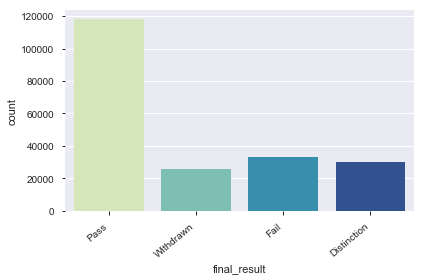

In [40]:
ax = sns.countplot(x="final_result", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Numerical variables:

- date_submitted
- score
- num_of_prev_attempts
- studied_credits
- module_presentation_length

"Score" column should be numeric, so we will have to transform the column type later on, when we get to analyse the column.

### date_submitted

The date of student submission, measured as the number of days since the start of the module presentation.

count    207156.000000
mean        114.595146
std          72.424603
min          -1.000000
25%          50.000000
50%         114.000000
75%         172.000000
max         608.000000
Name: date_submitted, dtype: float64

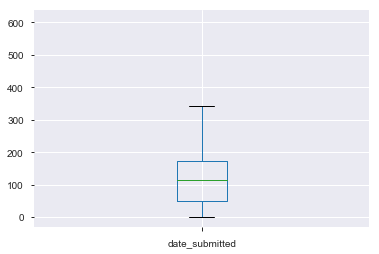

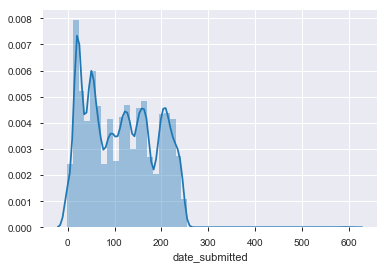

In [41]:
display(data.date_submitted.describe())

data.boxplot(column= ['date_submitted'])
plt.show()

sns.distplot(data.date_submitted)
plt.show()

In [42]:
crossdate = pd.crosstab(data.score, data.date_submitted, margins=True, margins_name='Total')
display(crossdate.head(3))
display(crossdate.tail(3))

date_submitted,-1,0,1,2,3,4,5,6,7,8,...,570,578,584,586,590,591,592,594,608,Total
score,,,,,,,,,,,,,,,,,,,,,
0.0,2,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,616
1.0,0,12,13,12,12,22,16,8,11,19,...,0,0,0,0,0,0,0,0,0,764
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


date_submitted,-1,0,1,2,3,4,5,6,7,8,...,570,578,584,586,590,591,592,594,608,Total
score,,,,,,,,,,,,,,,,,,,,,
99.0,7,1,0,0,1,6,4,2,2,0,...,0,0,0,0,0,0,0,0,0,976
100.0,280,21,10,14,45,20,25,20,13,24,...,0,0,0,0,0,0,0,0,0,20489
Total,3549,63,43,79,152,118,203,145,149,185,...,2,4,6,2,2,10,6,8,10,207156


We see that our minimum value is -11. This does not seem to make much sense since noone can submit an assessment before it's published. Our maximum value also seems exagerated.

Let's check the relationship between our negative date_submitted values and the final_result:

In [43]:
outliers_final_result = data[data['date_submitted']< 0][['date_submitted','final_result']]
outliers_final_result.final_result.value_counts()

Withdrawn      1976
Fail            872
Pass            607
Distinction      94
Name: final_result, dtype: int64

Let's zoom in the Pass and Distinction, to check if this is because they were banked:

In [44]:
outliers_final_result_pass = data[(data.date_submitted < 0) & (data.final_result == "Pass")]
outliers_final_result_pass.is_banked.value_counts()

1    607
Name: is_banked, dtype: int64

In [45]:
outliers_final_result_distinct = data[(data.date_submitted < 0) & (data.final_result == "Distinction")]
outliers_final_result_distinct.is_banked.value_counts()

1    94
Name: is_banked, dtype: int64

We have a total of 110 rows where the date_submitted have a negative value and the is_banked flag is 0. 
We'll drop those rows.

In [46]:
nonsense = data[(data.date_submitted < 0) & (data.is_banked == "0")].index

In [47]:
data.drop(nonsense, inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207156 entries, 0 to 207155
Data columns (total 17 columns):
id_assessment                 207156 non-null object
id_student                    207156 non-null object
date_submitted                207156 non-null int64
is_banked                     207156 non-null object
score                         207156 non-null float64
code_module                   207156 non-null object
code_presentation             207156 non-null object
gender                        207156 non-null object
region                        207156 non-null object
highest_education             207156 non-null object
imd_band                      207156 non-null object
age_band                      207156 non-null object
num_of_prev_attempts          207156 non-null int64
studied_credits               207156 non-null int64
disability                    207156 non-null object
final_result                  207156 non-null object
module_presentation_length    207156 non-nu

Now let's check the relationship between our greater than 365 date_submitted values and the final_result:

In [49]:
outliers_final_result_late = data[data['date_submitted']>365][['date_submitted','final_result']]
outliers_final_result_late.final_result.value_counts()

Withdrawn      69
Pass           34
Fail           15
Distinction     3
Name: final_result, dtype: int64

### score

The student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted

In [50]:
len(data.score.value_counts())

103

Seems weird to have 102 values since students should be rated from 0 to 100 (101 values).

Also, remember that this column is an object, and we need it to be numeric.

In [51]:
data.score.unique()

array([ 78.        ,  85.        ,  80.        ,  82.        ,
        70.        ,  68.        ,  64.        ,  60.        ,
        72.        ,  71.        ,  74.        ,  88.        ,
        75.        ,  69.        ,  30.        ,  63.        ,
        35.        ,  79.        ,  50.        ,  65.        ,
        62.        ,  73.        ,  81.        ,  76.        ,
        67.        ,  89.        ,  77.        ,  83.        ,
        42.        ,  66.        ,  59.        ,  61.        ,
        38.        ,  86.        ,  18.        ,  49.        ,
        57.        ,  55.        ,  84.        ,  47.        ,
        51.        ,  56.        ,  53.        ,  54.        ,
        45.        ,  87.        ,  46.        ,  43.        ,
        52.        ,  39.        ,  37.        ,  48.        ,
        40.        ,  32.        ,  90.        ,  58.        ,
        93.        ,  28.        ,  44.        ,  33.        ,
         0.        ,  94.        ,  91.        ,  95.  

We have a '?' value!

In [52]:
#There are quite a few '?' values

len(data[data['score']== '?'])

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0

Let's check the relationship between those values and final_result:

In [53]:
#Most of them are 'withdrawn' or 'fail'

unknown_score_final_result = data[data['score']=='?'][['score','final_result']]
unknown_score_final_result.final_result.value_counts()

Series([], Name: final_result, dtype: int64)

In [54]:
#We transform the column type to numeric and coerce errors

data.score = pd.to_numeric(data.score, errors='coerce')

In [55]:
data.score.unique()

array([ 78.        ,  85.        ,  80.        ,  82.        ,
        70.        ,  68.        ,  64.        ,  60.        ,
        72.        ,  71.        ,  74.        ,  88.        ,
        75.        ,  69.        ,  30.        ,  63.        ,
        35.        ,  79.        ,  50.        ,  65.        ,
        62.        ,  73.        ,  81.        ,  76.        ,
        67.        ,  89.        ,  77.        ,  83.        ,
        42.        ,  66.        ,  59.        ,  61.        ,
        38.        ,  86.        ,  18.        ,  49.        ,
        57.        ,  55.        ,  84.        ,  47.        ,
        51.        ,  56.        ,  53.        ,  54.        ,
        45.        ,  87.        ,  46.        ,  43.        ,
        52.        ,  39.        ,  37.        ,  48.        ,
        40.        ,  32.        ,  90.        ,  58.        ,
        93.        ,  28.        ,  44.        ,  33.        ,
         0.        ,  94.        ,  91.        ,  95.  

Of course, now the '?' values have been transformed to NaNs.

In [56]:
data.isnull().sum()

id_assessment                 0
id_student                    0
date_submitted                0
is_banked                     0
score                         0
code_module                   0
code_presentation             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
dtype: int64

In order to get rid of those NaNs, we decide the following:

- For those which final_result is "Withdrawn" of "Fail", we will change the value to 0.
- For those which final_result is "Pass", we will fill the value with the mean of all "Pass".
- For those which final_result is "Distinction", we will fill the value with the mean of all "Distinction".

In [57]:
data['score'] = np.where(((data['score'].isnull()) & (data['final_result'] =="Withdrawn")),0,data['score'])
data['score'] = np.where(((data['score'].isnull()) & (data['final_result'] =="Fail")),0,data['score'])
data['score'] = np.where(((data['score'].isnull()) & (data['final_result'] =="Pass")),
                         data[data['final_result']=='Pass']['score'].mean(),data['score'])
data['score'] = np.where(((data['score'].isnull()) & (data['final_result'] =="Distinction")),
                         data[data['final_result']=='Distinction']['score'].mean(),data['score'])

We check that we successfully got rid of the NaNs.

In [58]:
data.isnull().sum()

id_assessment                 0
id_student                    0
date_submitted                0
is_banked                     0
score                         0
code_module                   0
code_presentation             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
dtype: int64

So now we can analyze the column.

count    207156.000000
mean         75.335200
std          19.192128
min           0.000000
25%          65.000000
50%          79.000000
75%          89.000000
max         100.000000
Name: score, dtype: float64

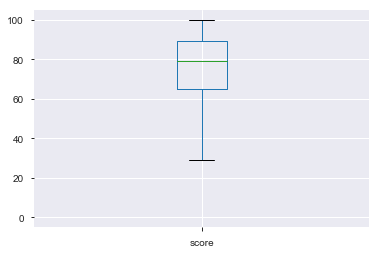

In [59]:
display(data.score.describe())
data.boxplot(column= ['score'])
plt.show()

### num_of_prev_attempts

In [60]:
data.num_of_prev_attempts.value_counts()

0    181126
1     20991
2      4004
3       755
4       215
5        49
6        16
Name: num_of_prev_attempts, dtype: int64

In [61]:
crossatt = pd.crosstab(data.score, data.num_of_prev_attempts, margins=True, margins_name='Total')
display(crossatt.head(3))
display(crossatt.tail(3))

num_of_prev_attempts,0,1,2,3,4,5,6,Total
score,,,,,,,,
0.0,486,92,30,8,0,0,0,616
1.0,672,71,14,7,0,0,0,764
2.0,15,1,1,0,0,0,0,17


num_of_prev_attempts,0,1,2,3,4,5,6,Total
score,,,,,,,,
99.0,920,50,6,0,0,0,0,976
100.0,18410,1620,365,74,14,5,1,20489
Total,181126,20991,4004,755,215,49,16,207156


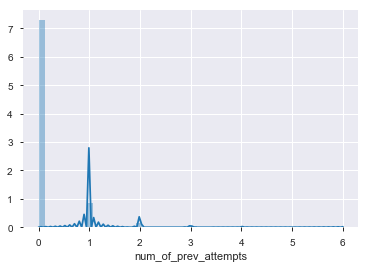

In [62]:
sns.distplot(data.num_of_prev_attempts)
plt.show()

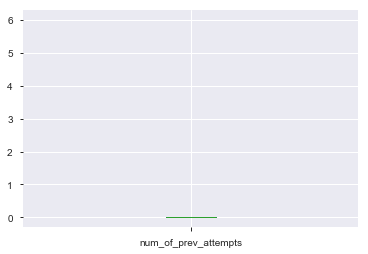

In [63]:
data.boxplot(column= ['num_of_prev_attempts'])

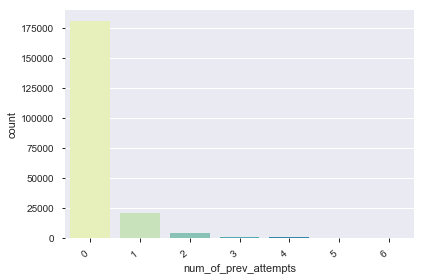

In [64]:
ax = sns.countplot(x="num_of_prev_attempts", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### studied_credits

In [65]:
data.studied_credits.value_counts()

60     109720
120     38016
30      22402
90      22259
150      4930
180      4199
240       975
75        780
210       756
70        708
130       254
45        207
80        206
270       202
100       196
135       186
160       112
300       111
40        109
110        98
105        79
195        66
190        51
140        47
165        47
220        39
145        38
360        36
330        34
250        31
170        29
200        25
115        23
85         21
50         19
310        17
95         15
155        14
235        12
280        12
325        11
430        11
55         10
225         9
630         9
345         6
420         5
65          4
255         4
215         3
205         2
355         1
Name: studied_credits, dtype: int64

In [66]:
crosscre = pd.crosstab(data.score, data.studied_credits, margins=True, margins_name='Total')
display(crosscre.head(3))
display(crosscre.tail(3))

studied_credits,30,40,45,50,55,60,65,70,75,80,...,310,325,330,345,355,360,420,430,630,Total
score,,,,,,,,,,,,,,,,,,,,,
0.0,65,0,1,0,0,294,0,0,1,6,...,1,0,0,0,0,0,0,0,0,616
1.0,19,0,0,0,0,556,0,0,3,0,...,0,0,0,0,0,0,0,0,0,764
2.0,2,0,0,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


studied_credits,30,40,45,50,55,60,65,70,75,80,...,310,325,330,345,355,360,420,430,630,Total
score,,,,,,,,,,,,,,,,,,,,,
99.0,77,2,1,0,0,527,0,6,1,1,...,0,0,1,0,0,0,0,0,0,976
100.0,5386,12,33,3,0,9539,0,35,87,5,...,0,2,8,0,0,0,0,0,1,20489
Total,22402,109,207,19,10,109720,4,708,780,206,...,17,11,34,6,1,36,5,11,9,207156


count    207156.000000
mean         78.134498
std          37.978138
min          30.000000
25%          60.000000
50%          60.000000
75%          90.000000
max         630.000000
Name: studied_credits, dtype: float64

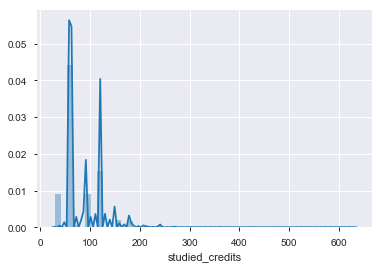

In [67]:
display(data.studied_credits.describe())

sns.distplot(data.studied_credits)
plt.show()

There are some rows where the studied_credits are greater than 360.

In [68]:
len(data[data['studied_credits']>360])

25

Let's check the relationship between those values and the final_result.

In [69]:
studiedcreditsout = data[data['studied_credits']>360][['studied_credits','final_result']]
studiedcreditsout.final_result.value_counts()

Pass    25
Name: final_result, dtype: int64

### module_presentation_length

In [70]:
data.module_presentation_length.value_counts()

269    47518
241    39611
268    39353
240    36251
262    17352
261    16711
234    10360
Name: module_presentation_length, dtype: int64

In [71]:
crossle = pd.crosstab(data.score, data.module_presentation_length, margins=True, margins_name='Total')
display(crossle.head(3))
display(crossle.tail(3))

module_presentation_length,234,240,241,261,262,268,269,Total
score,,,,,,,,
0.0,32,118,173,37,54,78,124,616
1.0,15,7,7,14,701,15,5,764
2.0,0,4,5,0,0,3,5,17


module_presentation_length,234,240,241,261,262,268,269,Total
score,,,,,,,,
99.0,2,109,243,33,35,186,368,976
100.0,2730,3580,2732,2369,1560,4320,3198,20489
Total,10360,36251,39611,16711,17352,39353,47518,207156


In [72]:
data.module_presentation_length.describe()

count    207156.000000
mean        255.399177
std          13.521083
min         234.000000
25%         241.000000
50%         262.000000
75%         268.000000
max         269.000000
Name: module_presentation_length, dtype: float64

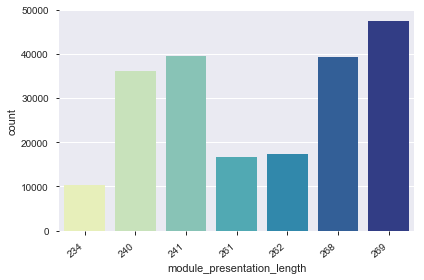

In [73]:
ax = sns.countplot(x="module_presentation_length", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## We will drop the id_student and id_assessment columns as we don't really need them

In [76]:
data = data.drop(['id_student', 'id_assessment'], axis=1)

In [77]:
data.head()

,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,18,0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,53,0,85.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
2,115,0,80.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
3,164,0,85.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
4,212,0,82.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268


# Let's now see the linear correlation

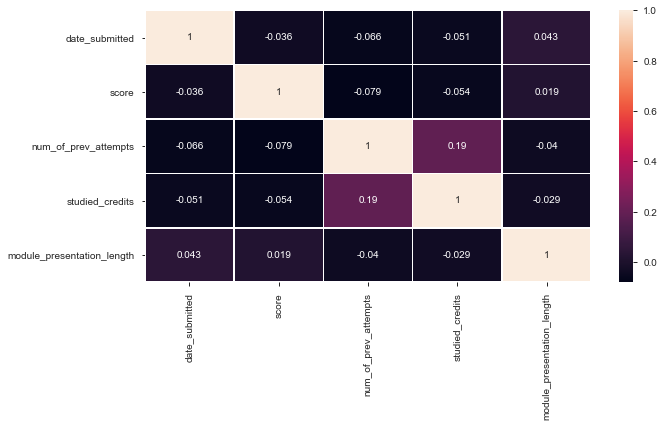

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

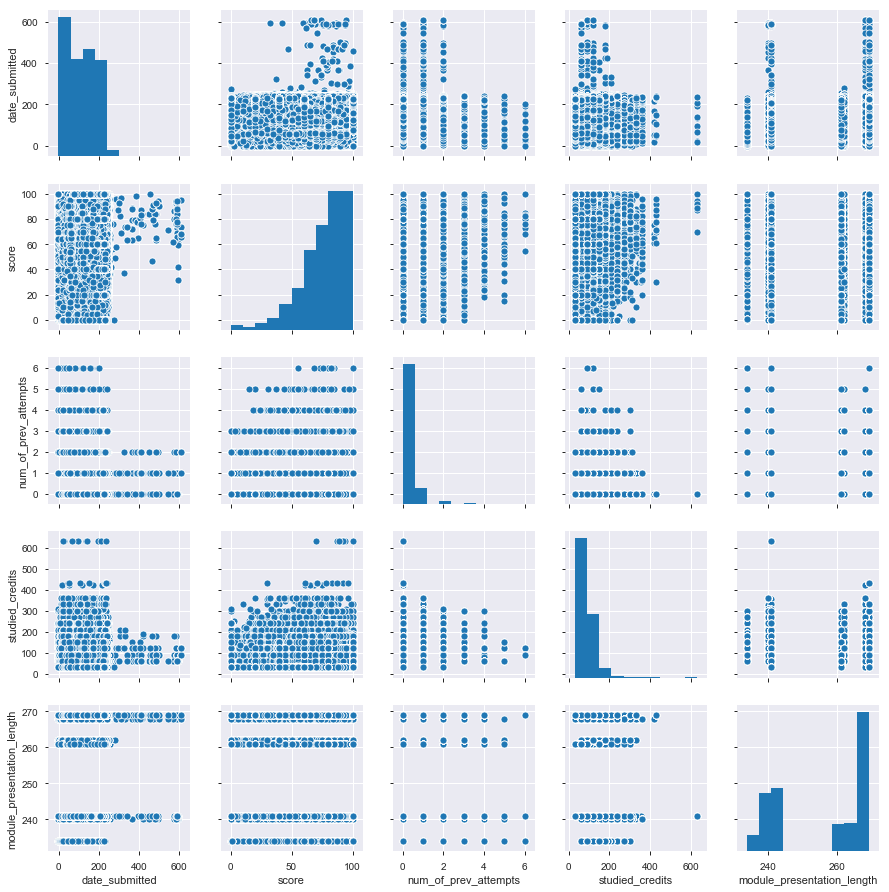

In [79]:
sns.pairplot(data[['date_submitted', 'score', 'num_of_prev_attempts', 'studied_credits', 'module_presentation_length']])

## Export the final file to .csv

In [82]:
data = data.to_csv('Data/ml.csv', index=False)